In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gdown=="4.6.3"

In [ ]:
!gdown "1SCVSvOFF9H1rZOrymOMQLYVuY70lbfed"

Downloading...
From: https://drive.google.com/uc?id=1SCVSvOFF9H1rZOrymOMQLYVuY70lbfed
To: /content/Marvel.csv
100% 5.85k/5.85k [00:00<00:00, 14.2MB/s]


In [ ]:
df = pd.read_csv("Marvel.csv")
df.head()

,movie,category,year,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend
0,Ant-Man and the Wasp: Quantumania,Ant-Man,2023,476,190%,47%,83%,36%,250.0,213,263,104.0,32.0,-69%,21.8,44.80%,55.20%,41.60%
1,Guardians of the Galaxy Vol. 3,Guardians,2023,845,338%,82%,95%,-13%,250.0,358,487,118.0,49.0,-59%,14.0,42.40%,57.60%,47.20%
2,The Marvels,Unique,2023,503,201%,57%,73%,-16%,250.0,215,288,81.0,27.0,-67%,16.1,42.70%,57.30%,32.40%
3,Spider-Man: Across the Spider-Verse,Spider-Man,2023,680,681%,96%,94%,2%,100.0,380,300,120.0,52.0,-57%,17.6,55.90%,44.10%,120.00%
4,Ant-Man and the Wasp: Quantumania,Ant-Man,2023,476,238%,47%,83%,36%,200.0,213,263,106.1,38.1,-64%,35.6,44.75%,55.25%,53.05%


In [ ]:
df.shape

(51, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie                           51 non-null     object 
 1   category                        51 non-null     object 
 2   year                            51 non-null     int64  
 3   worldwide gross ($m)            51 non-null     int64  
 4   % budget recovered              51 non-null     object 
 5   critics % score                 51 non-null     object 
 6   audience % score                51 non-null     object 
 7   audience vs critics % deviance  51 non-null     object 
 8   budget                          51 non-null     float64
 9   domestic gross ($m)             51 non-null     int64  
 10  international gross ($m)        51 non-null     int64  
 11  opening weekend ($m)            51 non-null     float64
 12  second weekend ($m)             51 non

# Convert some Columns Datatype Object -> Numeric

In [ ]:
datatype_convert = [
    '% budget recovered',
    'critics % score',
    'audience % score',
    'audience vs critics % deviance',
    '1st vs 2nd weekend drop off',
    '% gross from domestic',
    '% gross from international',
    '% budget opening weekend'
]
for col in datatype_convert:
    df[col] = pd.to_numeric(df[col].str.replace('%', ''))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie                           51 non-null     object 
 1   category                        51 non-null     object 
 2   year                            51 non-null     int64  
 3   worldwide gross ($m)            51 non-null     int64  
 4   % budget recovered              51 non-null     int64  
 5   critics % score                 51 non-null     int64  
 6   audience % score                51 non-null     int64  
 7   audience vs critics % deviance  51 non-null     int64  
 8   budget                          51 non-null     float64
 9   domestic gross ($m)             51 non-null     int64  
 10  international gross ($m)        51 non-null     int64  
 11  opening weekend ($m)            51 non-null     float64
 12  second weekend ($m)             51 non

# Deal with missing value

In [ ]:
df.isnull().sum()

,0
movie,0
category,0
year,0
worldwide gross ($m),0
% budget recovered,0
critics % score,0
audience % score,0
audience vs critics % deviance,0
budget,0
domestic gross ($m),0


In [ ]:
df.describe()

,year,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2017.764706,838.333333,499.058824,78.960784,83.196078,3.568627,187.872549,344.568627,493.450980,129.215686,52.470588,-59.450980,34.716251,42.570980,57.385882,73.643725
std,4.398128,495.672822,250.152546,14.733582,10.930727,11.918481,65.736355,176.882589,333.900124,62.859422,27.510974,5.984359,10.309658,6.689383,6.699022,40.391225
min,2008.000000,265.000000,190.000000,37.000000,45.000000,-26.000000,58.000000,132.000000,130.000000,53.100000,21.300000,-69.000000,0.159700,30.700000,44.100000,32.400000
25%,2015.000000,476.000000,309.000000,72.500000,77.000000,-2.000000,150.000000,213.000000,267.000000,83.000000,33.000000,-64.000000,32.650000,36.805000,52.540000,48.620000
50%,2018.000000,760.000000,432.000000,84.000000,85.000000,1.000000,186.000000,324.000000,420.000000,118.000000,45.300000,-59.000000,36.600000,42.680000,57.320000,58.100000
75%,2021.500000,915.000000,656.500000,90.500000,91.000000,6.000000,212.500000,408.000000,542.000000,163.500000,63.350000,-56.000000,41.550000,47.360000,63.195000,88.350000
max,2023.000000,2797.000000,1350.000000,96.000000,98.000000,36.000000,400.000000,858.000000,1939.000000,357.000000,147.000000,-45.000000,48.600000,55.900000,69.300000,228.280000


# Total Number of Movies Released Per Year

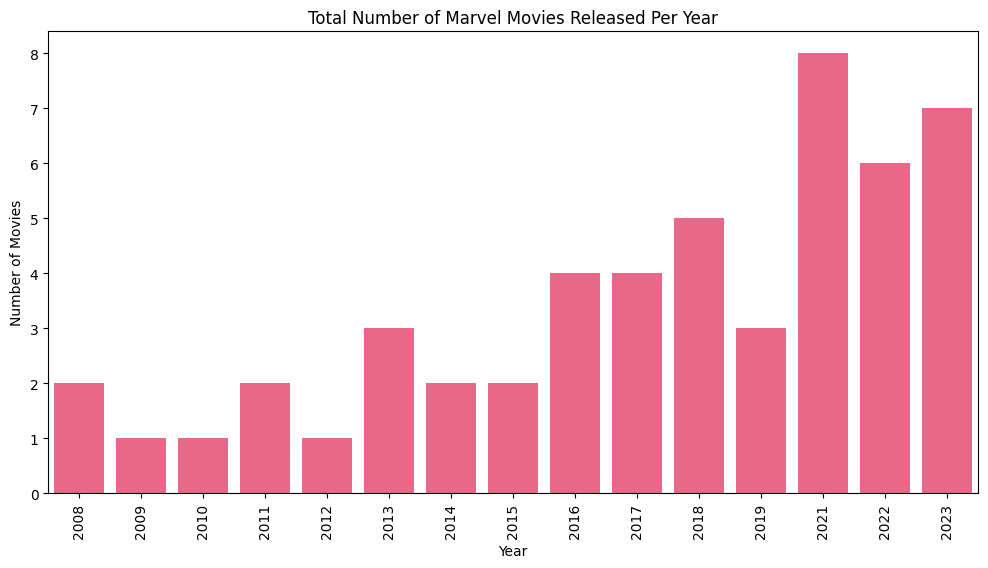

In [ ]:
movies_per_year = pd.DataFrame(df.groupby('year').size())
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year[0], data=movies_per_year, color = "#ff5280")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Total Number of Marvel Movies Released Per Year")
plt.xticks(rotation=90)
plt.show()

# Box Office Performance

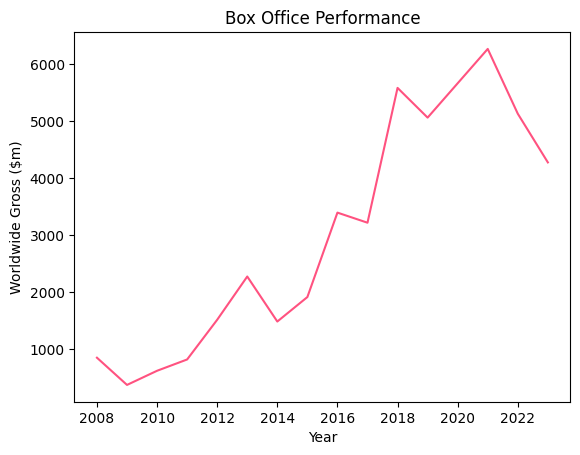

In [ ]:
world_wide_box_office = df.groupby('year')['worldwide gross ($m)'].sum()
sns.lineplot(x=world_wide_box_office.index, y=world_wide_box_office.values, color = "#ff5280")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross ($m)")
plt.title("Box Office Performance")
plt.show()

# Top 10 Highest Grossing Movies

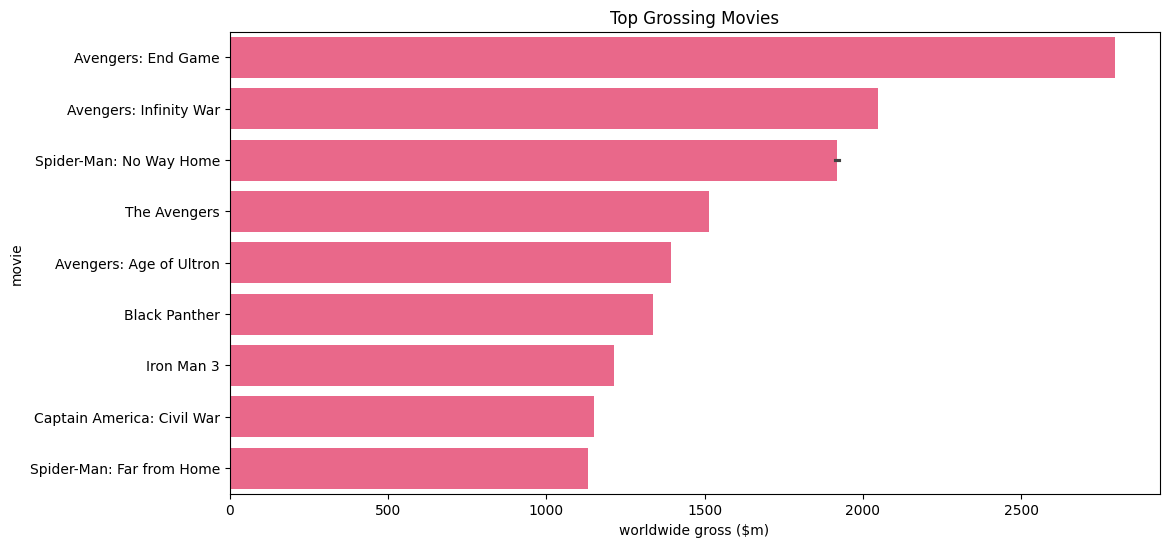

In [ ]:
top_grossing_movies = df[["worldwide gross ($m)" , "movie"]].nlargest(10, "worldwide gross ($m)")
plt.figure(figsize=(12, 6))
sns.barplot(x="worldwide gross ($m)", y="movie", data=top_grossing_movies, color = "#ff5280")
plt.title("Top Grossing Movies")
plt.show()

# Audience vs Critics Score Distribution:


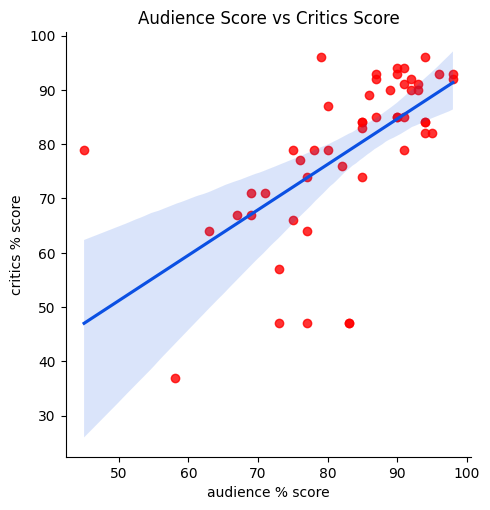

In [ ]:
sns.lmplot(x="audience % score", y="critics % score", data=df,scatter_kws={"color" : "red"} , line_kws={"color":"#0b50e3"})
plt.title("Audience Score vs Critics Score")
plt.show()

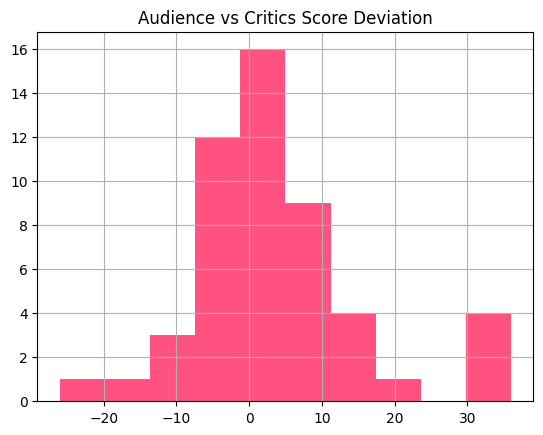

In [ ]:
df["audience vs critics % deviance"].hist(bins=10, color = "#ff5280")
plt.title("Audience vs Critics Score Deviation")
plt.show()

# Budget vs. Worldwide Gross

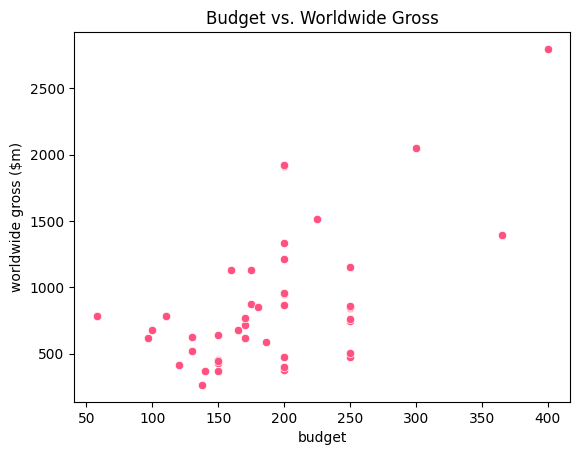

In [ ]:
sns.scatterplot(x="budget", y="worldwide gross ($m)", data=df, color = "#ff5280")
plt.title("Budget vs. Worldwide Gross")
plt.show()

# Peercentage budget recover

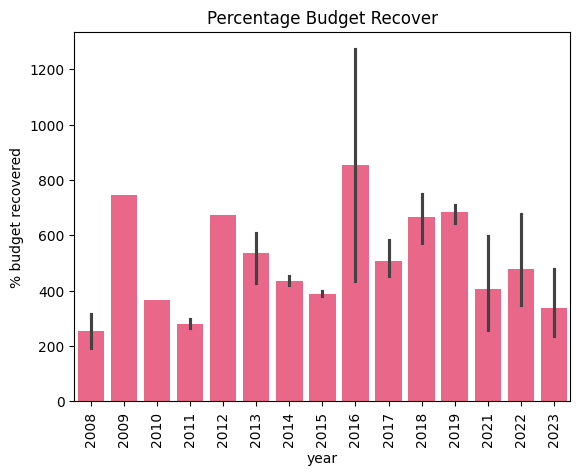

In [ ]:
sns.barplot(x="year", y="% budget recovered", data=df, color = "#ff5280")
plt.title("Percentage Budget Recover")
plt.xticks(rotation=90)
plt.show()

# Opening Weekend performance

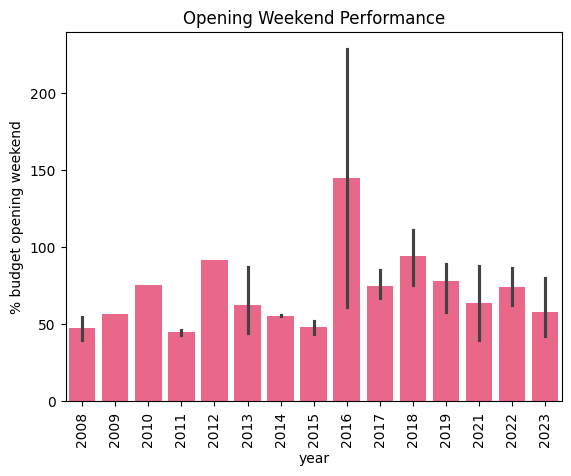

In [ ]:
sns.barplot(x="year", y="% budget opening weekend", data=df, color = "#ff5280")
plt.title("Opening Weekend Performance")
plt.xticks(rotation=90)
plt.show()

# Performance By Movie category

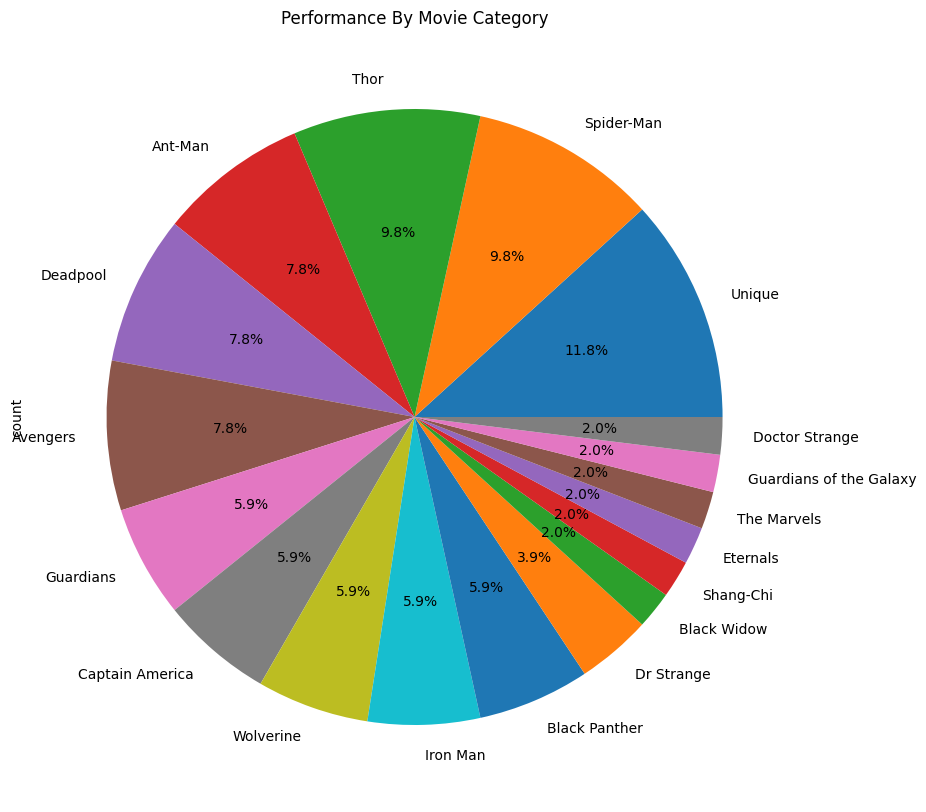

In [ ]:
df["category"].value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=3600)
plt.title("Performance By Movie Category")
plt.show()

# Distrubation of Numeric features

<Figure size 1200x600 with 0 Axes>

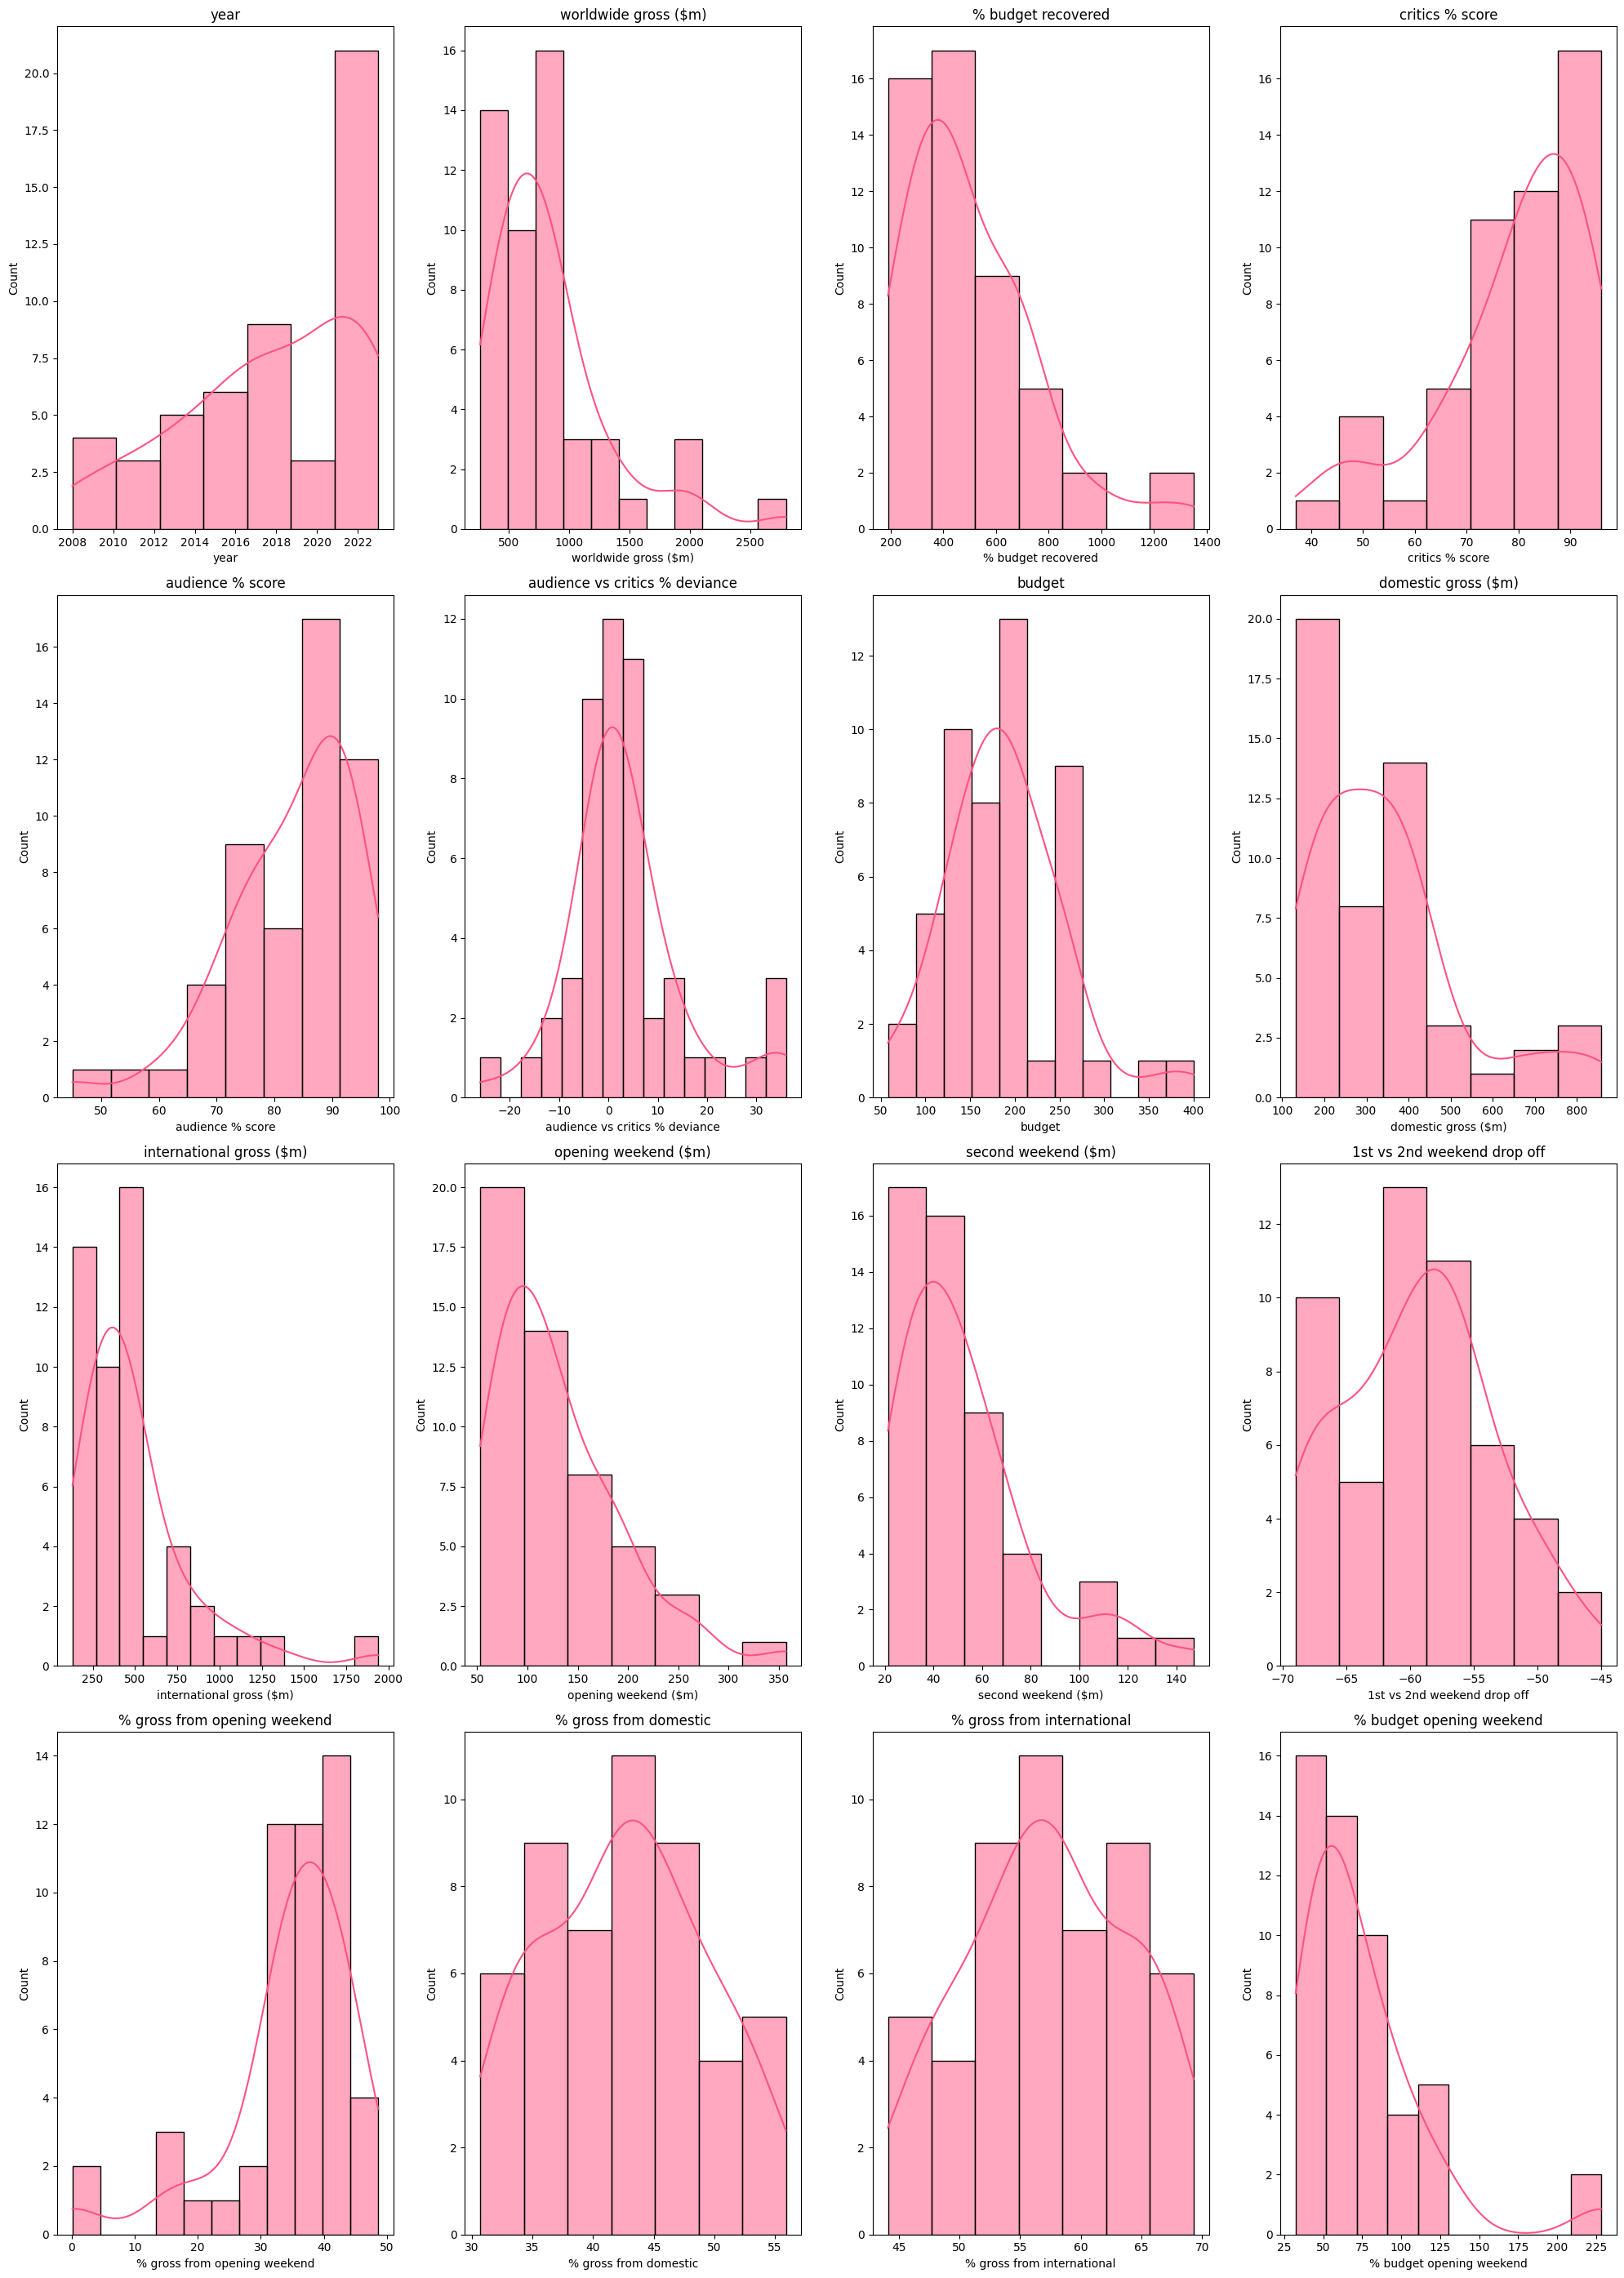

In [ ]:
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(12, 6))
number_col = 4
number_row = (len(numeric_col) + number_col - 1) // number_col
plt.figure(figsize = (20,number_row*7))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(number_row, number_col, i)
    sns.histplot(df[col], kde=True, color = "#ff5280")
    plt.title(col)
plt.tight_layout()
plt.show()

# Distrubation of Weekend Earning

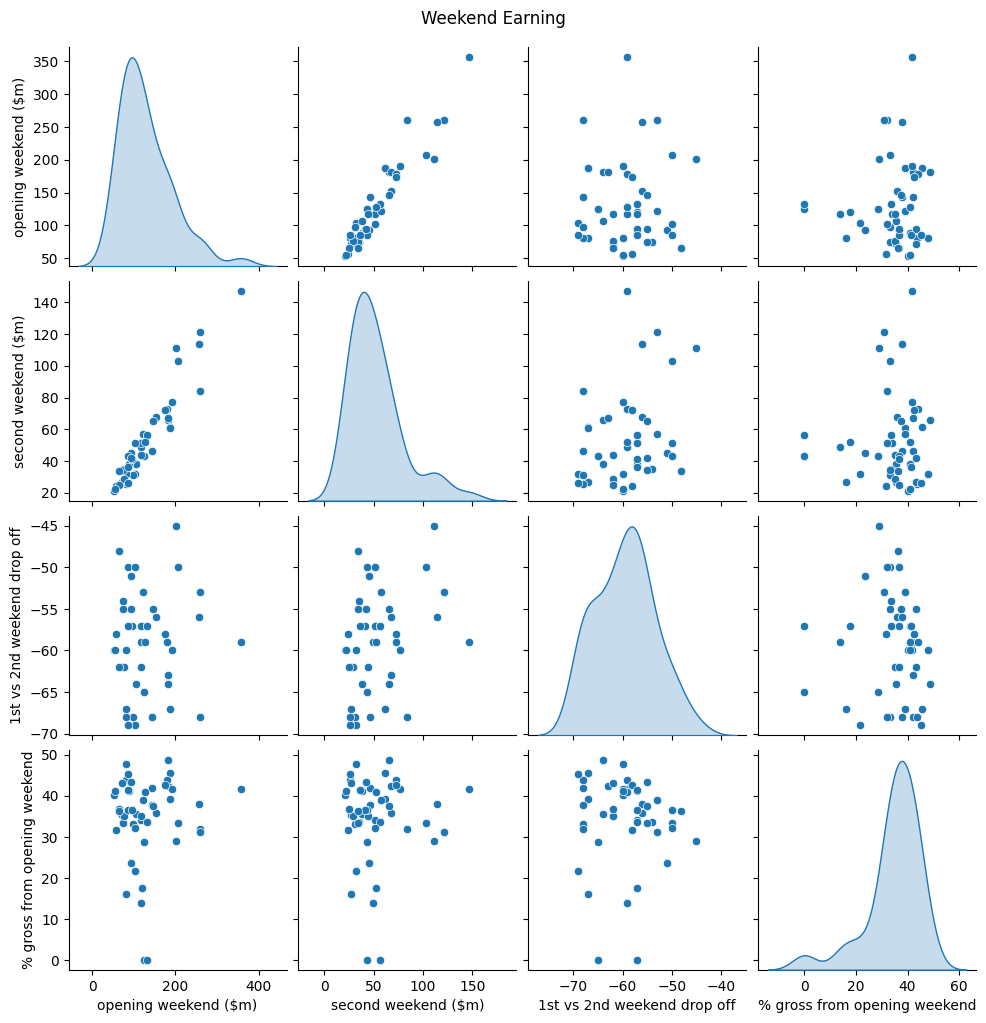

In [ ]:
weekend_df = df[['opening weekend ($m)','second weekend ($m)','1st vs 2nd weekend drop off','% gross from opening weekend']]
sns.pairplot(weekend_df, diag_kind='kde',height=2.5)
plt.suptitle('Weekend Earning', y=1.02 )
plt.show()


# Correlation Plot

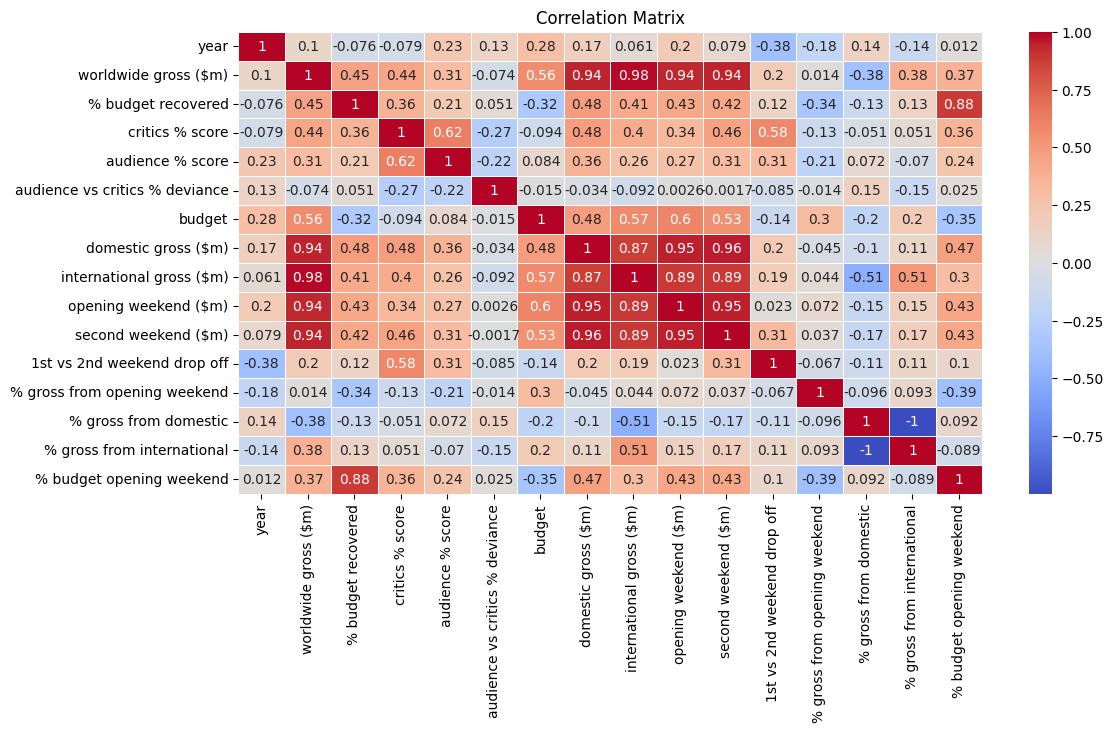

In [ ]:
corr_matrix = df[numeric_col].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Mean success Metrics by Category

Text(0, 0.5, 'Mean Success Metrics')

<Figure size 1500x1000 with 0 Axes>

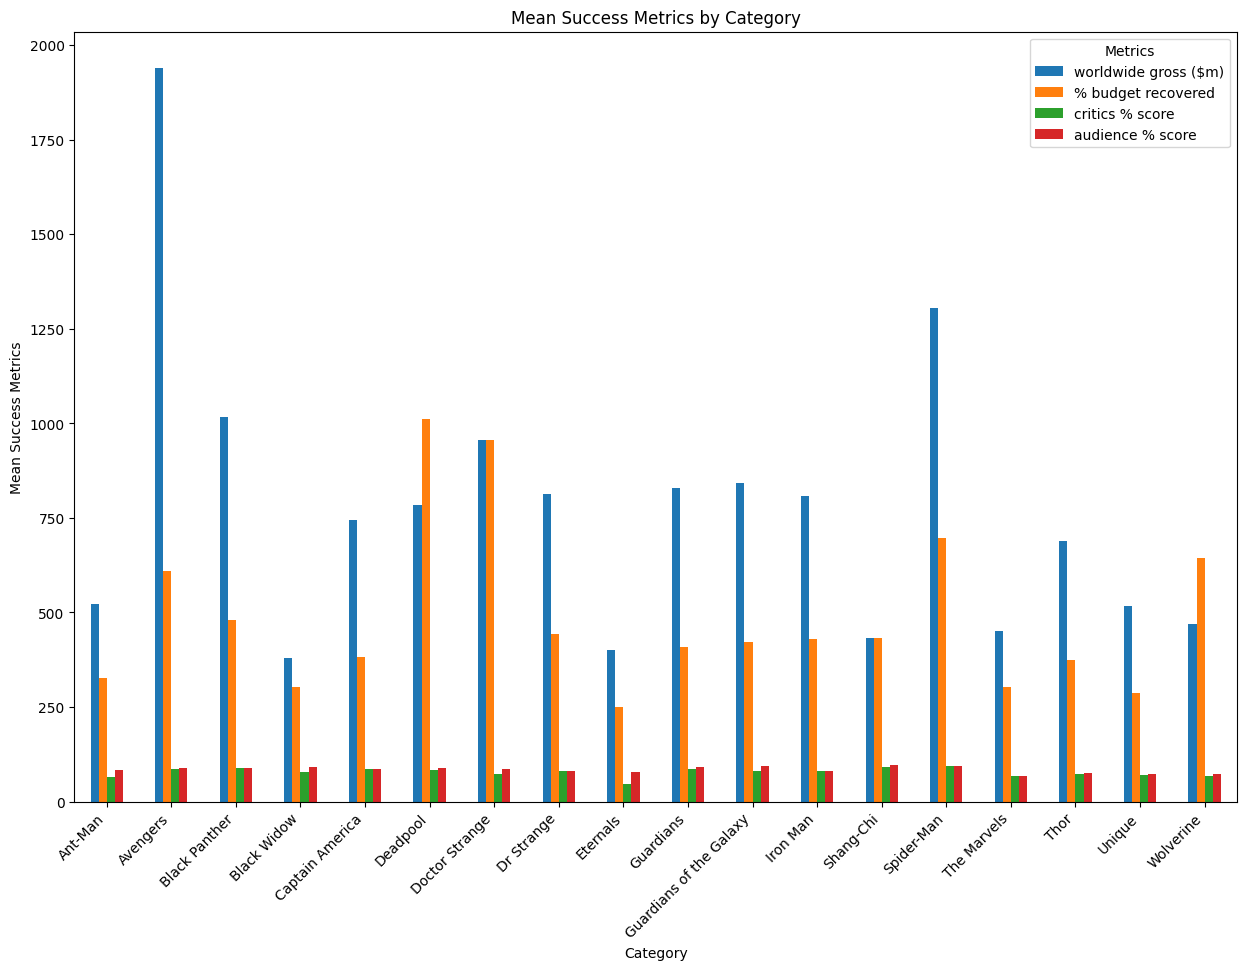

In [ ]:
success_matrics = ['worldwide gross ($m)', '% budget recovered', 'critics % score', 'audience % score']
cat_success_comparison = df.groupby('category')[success_matrics].mean()
plt.figure(figsize=(15, 10))
cat_success_comparison.plot(kind='bar',figsize=(15, 10))
plt.xticks(rotation=45,ha="right")
plt.title("Mean Success Metrics by Category")
plt.xlabel("Category")
plt.legend(title="Metrics")
plt.ylabel("Mean Success Metrics")

# Hypothesis

In [ ]:
from scipy.stats import norm

In [ ]:
H0 = "No correlation between the budget and worldwide gross income"
Ha = "There is a correlation between the budget and worldwide gross income"

alpha = 0.05
n = len(df)
r = df['budget'].corr(df['worldwide gross ($m)'])
z = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
p = 2 * (1 - norm.cdf(abs(z)))  # Two-tailed test
print("Z-score:", z)
print("P-value:", p)

if p < alpha:
    print("Reject the null hypothesis therefore ")
    print(Ha)
else:
    print("Fail to reject the null hypothesis therefore ")
    print(H0)

Z-score: 4.7032187935541465
P-value: 2.5609172935592284e-06
Reject the null hypothesis therefore 
There is a correlation between the budget and worldwide gross income


In [ ]:
h0 = "no correlation between opening weekend earnings and the percentage of budget recovered by Marvel movies"
ha = "there is a correlation between opening weekend earnings and the percentage of budget recovered by Marvel"
n = len(df)
r = df['% budget opening weekend'].corr(df['opening weekend ($m)'])
z = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
p = 2 * (1 - norm.cdf(abs(z)))
print("Z-score:", z)
print("P-value:", p)

if p < alpha:
    print("Reject the null hypothesis therefore ")
    print(ha)
else:
    print("Fail to reject the null hypothesis therefore ")
    print(h0)

Z-score: 3.3454207513235845
P-value: 0.000821578337475426
Reject the null hypothesis therefore 
there is a correlation between opening weekend earnings and the percentage of budget recovered by Marvel


In [ ]:
from scipy.stats import ttest_ind

h0 = "no difference in the audience vs. critics % deviance between Deadpool movies and other Marvel movie categories."
ha = "there is a significant difference in the audience vs. critics % deviance between Deadpool movies and other Marvel movie categories"

deadpool_deviance = df[df['category'] == 'Deadpool']['audience vs critics % deviance']
other_deviance = df[df['category'] != 'Deadpool']['audience vs critics % deviance']

t_stat, p_value = ttest_ind(deadpool_deviance, other_deviance, equal_var=False)  # Assuming unequal variance

print("t-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis therefore ")
    print(ha)
else:
    print("Fail to reject the null hypothesis therefore ")
    print(h0)


t-statistic: -0.2873617197991802
P-value: 0.7761368867313576
Fail to reject the null hypothesis therefore 
no difference in the audience vs. critics % deviance between Deadpool movies and other Marvel movie categories.


In [ ]:
h0 = "The timing of release relative to major events or holidays has no impact on the worldwide gross earnings of Marvel movies."
ha = "The timing of release relative to major events or holidays has a significant impact on the worldwide gross earnings of Marvel"
n = len(df)
r = df['1st vs 2nd weekend drop off'].corr(df['worldwide gross ($m)'])
z = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
p = 2 * (1 - norm.cdf(abs(z)))
print("Z-score:", z)
print("P-value:", p)

if p < alpha:
    print("Reject the null hypothesis therefore ")
    print(ha)
else:
    print("Fail to reject the null hypothesis therefore ")
    print(h0)

Z-score: 1.4185282667233898
P-value: 0.15603659207260434
Fail to reject the null hypothesis therefore 
The timing of release relative to major events or holidays has no impact on the worldwide gross earnings of Marvel movies.
